In [17]:
# import tensorflow as tf
# from tensorflow.keras import layers, Model

# def conv_block(inputs, num_filters):
#     x = layers.Conv2D(num_filters, kernel_size=(3, 3), padding="same")(inputs)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)
#     x = layers.Conv2D(num_filters, kernel_size=(3, 3), padding="same")(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)
#     return x

# def unet_plus_plus(input_shape, num_classes):
#     inputs = layers.Input(input_shape)

#     # Encoder
#     c1 = conv_block(inputs, 64)
#     p1 = layers.MaxPooling2D((2, 2))(c1)
    
#     c2 = conv_block(p1, 128)
#     p2 = layers.MaxPooling2D((2, 2))(c2)
    
#     c3 = conv_block(p2, 256)
#     p3 = layers.MaxPooling2D((2, 2))(c3)
    
#     c4 = conv_block(p3, 512)
#     p4 = layers.MaxPooling2D((2, 2))(c4)
    
#     c5 = conv_block(p4, 1024)

#     # Decoder
#     u4_2 = layers.UpSampling2D((2, 2))(c5)
#     u4_2 = layers.Concatenate()([u4_2, c4])
#     u4_2 = conv_block(u4_2, 512)

#     u3_2 = layers.UpSampling2D((2, 2))(u4_2)
#     u3_2 = layers.Concatenate()([u3_2, c3])
#     u3_2 = conv_block(u3_2, 256)

#     u2_2 = layers.UpSampling2D((2, 2))(u3_2)
#     u2_2 = layers.Concatenate()([u2_2, c2])
#     u2_2 = conv_block(u2_2, 128)

#     u1_2 = layers.UpSampling2D((2, 2))(u2_2)
#     u1_2 = layers.Concatenate()([u1_2, c1])
#     u1_2 = conv_block(u1_2, 64)
    
#     # Output
#     outputs = layers.Conv2D(num_classes, (1, 1), activation="softmax")(u1_2)
    
#     model = Model(inputs, outputs)
    
#     return model

# # Example Usage
# input_shape = (256, 256, 3)  # Example input shape (Height, Width, Channels)
# num_classes = 2  # Example number of output classes
# model = unet_plus_plus(input_shape, num_classes)
# model.summary()


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def conv_block(inputs, num_filters):
    x = layers.Conv2D(num_filters, kernel_size=(3, 3), padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(num_filters, kernel_size=(3, 3), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def unet_plus_plus(input_shape, num_classes):
    inputs = layers.Input(input_shape)

    # Encoder
    c1 = conv_block(inputs, 32)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = conv_block(p1, 64)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = conv_block(p2, 128)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    
    c4 = conv_block(p3, 256)
    p4 = layers.MaxPooling2D((2, 2))(c4)
    
    c5 = conv_block(p4, 512)
    p5 = layers.MaxPooling2D((2, 2))(c5)
    
    c6 = conv_block(p5, 1024)

    # Decoder
    u4_2 = layers.UpSampling2D((2, 2))(c6)
    u4_2 = layers.Concatenate()([u4_2, c5])
    u4_2 = conv_block(u4_2, 512)

    u3_2 = layers.UpSampling2D((2, 2))(u4_2)
    u3_2 = layers.Concatenate()([u3_2, c4])
    u3_2 = conv_block(u3_2, 256)

    u2_2 = layers.UpSampling2D((2, 2))(u3_2)
    u2_2 = layers.Concatenate()([u2_2, c3])
    u2_2 = conv_block(u2_2, 128)

    u1_2 = layers.UpSampling2D((2, 2))(u2_2)
    u1_2 = layers.Concatenate()([u1_2, c2])
    u1_2 = conv_block(u1_2, 64)
    
    u0_2 = layers.UpSampling2D((2, 2))(u1_2)
    u0_2 = layers.Concatenate()([u0_2, c1])
    u0_2 = conv_block(u0_2, 32)  # Fix: Passing u1_2 instead of u4_2
    
    # Output
    outputs = layers.Conv2D(num_classes, (1, 1), activation="softmax")(u0_2)
    
    model = Model(inputs, outputs)
    
    return model

# Example Usage
input_shape = (256, 256, 3)  # Example input shape (Height, Width, Channels)
num_classes = 3  # Example number of output classes
model = unet_plus_plus(input_shape, num_classes)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_46 (Conv2D)             (None, 256, 256, 32  896         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 256, 256, 32  128        ['conv2d_46[0][0]']              
 ormalization)                  )                                                           

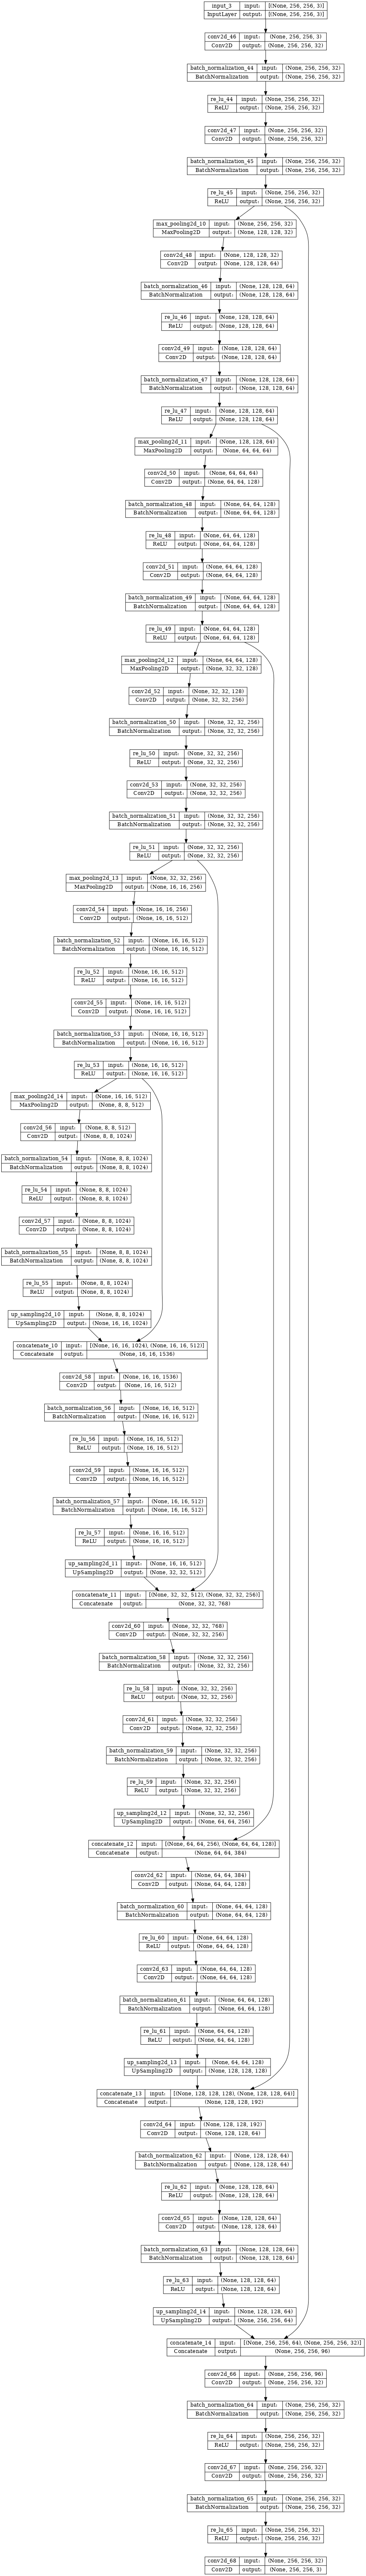

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True, dpi=64)

In [3]:
import numpy as np
train_dataset = np.load("../../numpy_arr_data/train_img.npy")
mask_dataset = np.load("../../numpy_arr_data/vegetation_mask_img.npy")

In [23]:
train_dataset.shape, mask_dataset.shape

((2975, 512, 512, 3), (2975, 512, 512, 3))

In [24]:
# import numpy as np
# import matplotlib.pyplot as plt

# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# gray_mask = []
# for mask in mask_dataset:
#     mask = rgb2gray(mask)
#     mask[mask<0.5]=0
#     mask[mask>=0.5]=1
#     gray_mask.append(mask) 

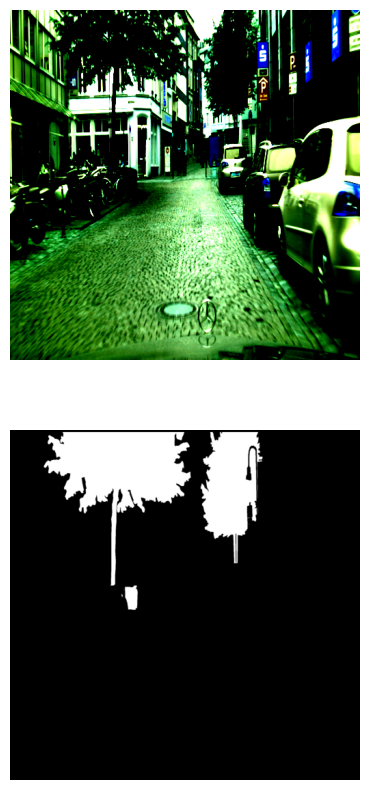

In [25]:
import matplotlib.pyplot as plt

# Example list of images (replace with your actual images)
images = [train_dataset[0], mask_dataset[0]]  # Replace with your actual images

# Number of images
num_images = len(images)

# Determine the grid size (e.g., 2 rows, 3 columns for 6 images)
rows = 2
cols = (num_images + 1) // 2

# Create a figure
plt.figure(figsize=(10, 10))

# Loop through the images and add each to a subplot
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    plt.axis('off')  # Hide the axis

# Show the plot
plt.show()

In [26]:
# gray_mask = np.array(gray_mask)
# gray_mask = gray_mask[...,np.newaxis]

In [27]:
from tensorflow.keras.utils import Sequence
class DataGenerator(Sequence):
    def __init__(self, image_data, mask_data, batch_size=32, shuffle=True):
        self.image_data = image_data
        self.mask_data = mask_data
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()
    
    def __len__(self):
        # Denotes the number of batches per epoch
        return int(np.floor(len(self.image_data) / self.batch_size))
    
    def __getitem__(self, index):
        # Generate one batch of data
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        
        # Find list of IDs
        batch_image_data = [self.image_data[k] for k in indexes]
        batch_mask_data = [self.mask_data[k] for k in indexes]
        
        # Generate data
        X, y = self.__data_generation(batch_image_data, batch_mask_data)
        
        return X, y
    
    def on_epoch_end(self):
        # Updates indexes after each epoch
        self.indexes = np.arange(len(self.image_data))
        if self.shuffle:
            np.random.shuffle(self.indexes)
    
    def __data_generation(self, batch_image_data, batch_mask_data):
        # Resize images and masks to the target shape (128, 128)
        resized_images = [tf.image.resize(image, (256, 256)).numpy() for image in batch_image_data]
        resized_masks = [tf.image.resize(mask, (256, 256)).numpy() for mask in batch_mask_data]
        
        # Convert lists to numpy arrays
        X = np.array(resized_images)
        y = np.array(resized_masks)
        
        return X, y
    
batch_size = 8
train_generator = DataGenerator(train_dataset, mask_dataset, batch_size=batch_size)

In [28]:
train_generator.image_data.shape, train_generator.mask_data.shape

((2975, 512, 512, 3), (2975, 512, 512, 3))

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define the conv_block and unet_plus_plus functions as above

# 1. Data Preparation
input_shape = (256, 256, 3)  # Example input shape (Height, Width, Channels)
num_classes = 2  # Example number of output classes


model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Training
epochs = 50  # Number of training epochs
steps_per_epoch = 200  # Adjust based on your dataset size

model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs)

# Optionally, save the trained model
model.save('unet_plus_plus_model.h5')

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell
      result = self._run_cell(
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell
      result = runner(coro)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/tmp/ipykernel_2787/957437268.py", line 19, in <module>
      model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/opt/conda/lib/python3.10/site-packages/keras/backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [524288,3] and labels shape [1572864]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_33208]

In [13]:
def debug_shapes(inputs, labels):
    outputs = model(inputs)
    print(f"Model output shape: {outputs.shape}")
    print(f"Ground truth shape: {labels.shape}")
    return outputs, labels

# Insert this check in your training loop
for batch in train_generator:
    inputs, labels = batch
    outputs, labels = debug_shapes(inputs, labels)
    break  # Just check the first batch for now


Model output shape: (8, 16, 16, 1)
Ground truth shape: (8, 256, 256, 3)
